In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
del df['Product_Category_2']

In [5]:
df.shape

(537577, 11)

In [6]:
df.drop(columns=['Product_Category_3'])

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

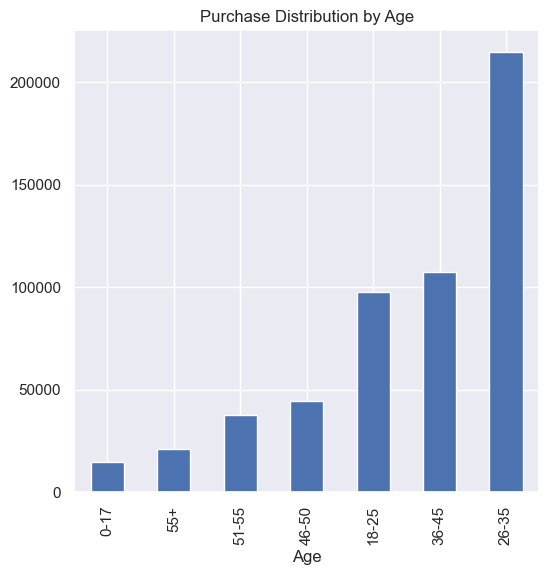

In [75]:
df.groupby('Age').size().sort_values().plot(kind='bar', figsize=(6,6), title='Purchase Distribution by Age')

In [28]:
lst=[]
for i in df["Age"].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])

data= pd.DataFrame(lst, columns=['Age','Products'])

In [27]:
lst

[['0-17', ':', 2300],
 ['55+', ':', 2573],
 ['26-35', ':', 3419],
 ['46-50', ':', 3099],
 ['51-55', ':', 2877],
 ['36-45', ':', 3318],
 ['18-25', ':', 3213]]

<Axes: xlabel='Age'>

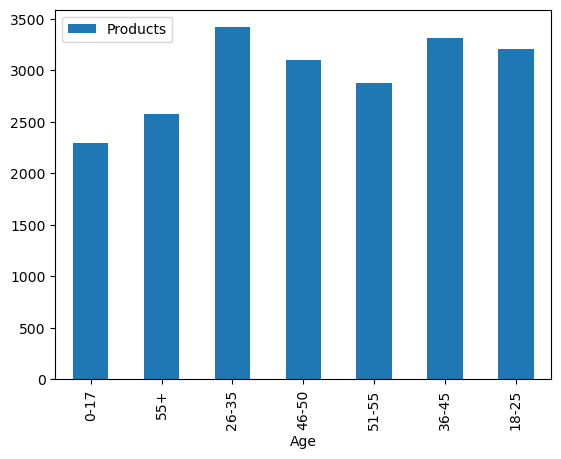

In [32]:
data.plot(kind='bar', x='Age')

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

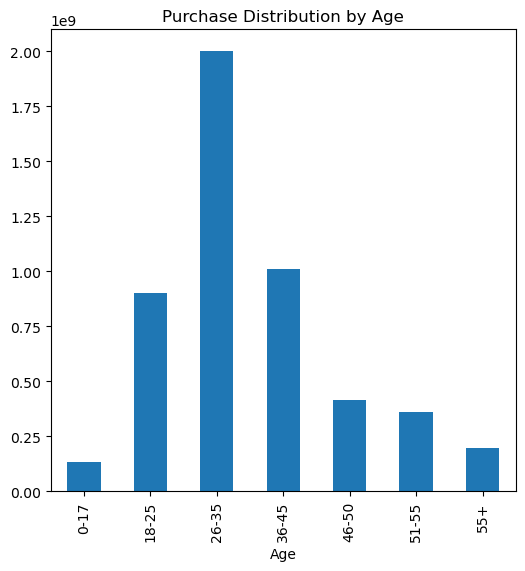

In [35]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar', figsize=(6,6), title='Purchase Distribution by Age')

<Axes: title={'center': 'Amount spent by Age'}, xlabel='Age'>

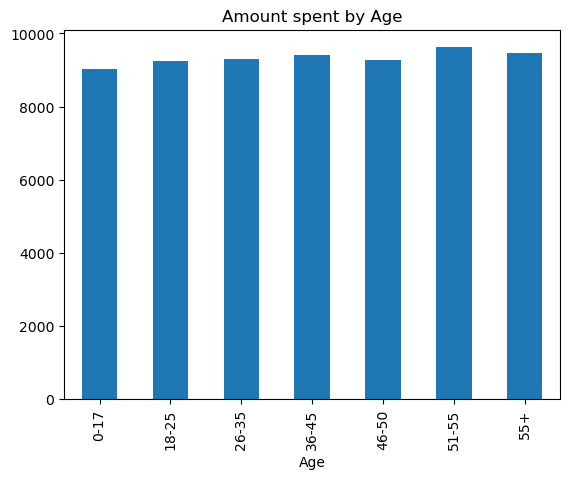

In [43]:
df.groupby('Age')['Purchase'].mean().plot(kind='bar', title='Amount spent by Age')

<Axes: ylabel='Purchase'>

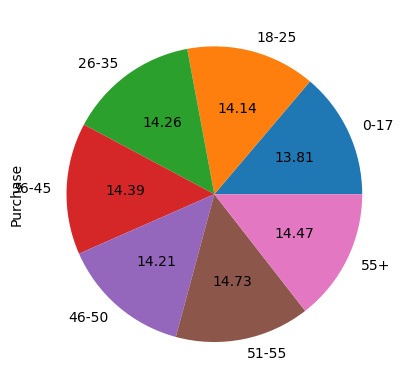

In [44]:
df.groupby('Age')['Purchase'].mean().plot(kind='pie',autopct="%.2f")

<Axes: xlabel='Gender'>

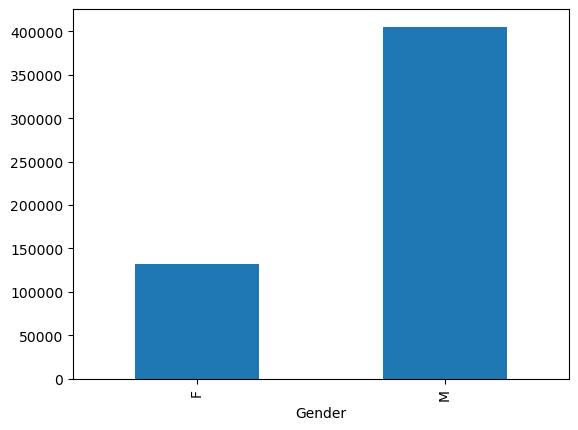

In [57]:
df.groupby('Gender').size().plot(kind='bar')

In [58]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='count'>

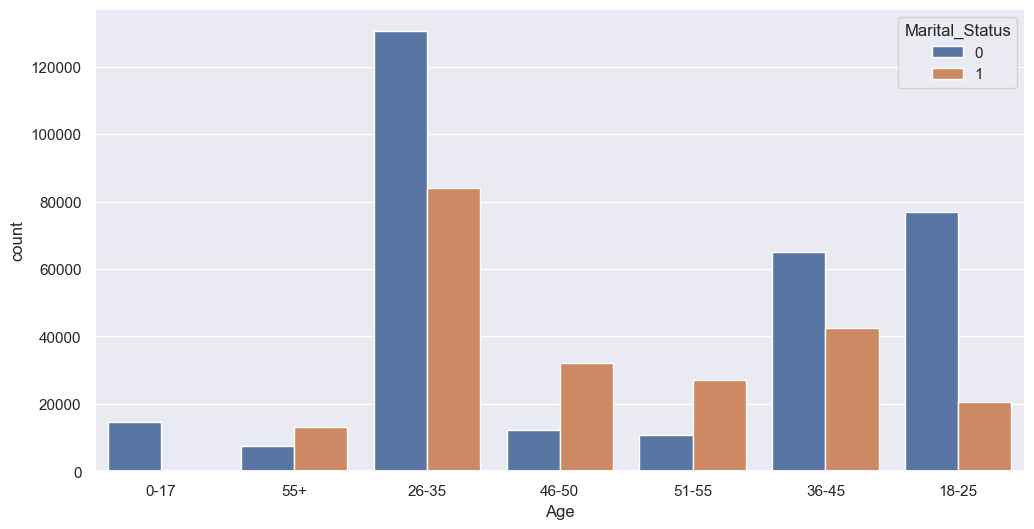

In [64]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Age" , hue="Marital_Status", data =df)

<Axes: xlabel='Gender', ylabel='count'>

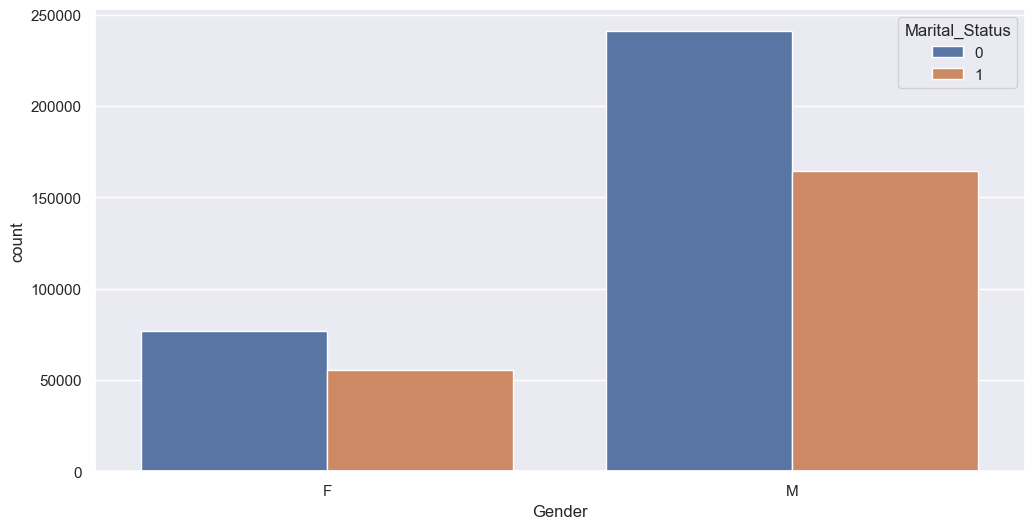

In [65]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Gender" , hue="Marital_Status", data =df)

<Axes: xlabel='Marital_Status', ylabel='count'>

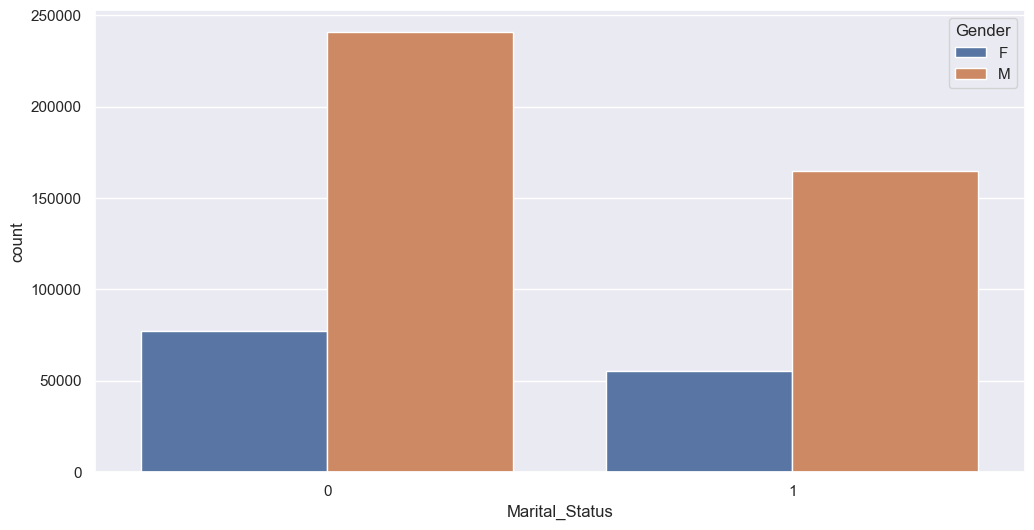

In [66]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Marital_Status" , hue="Gender", data =df)

<Axes: >

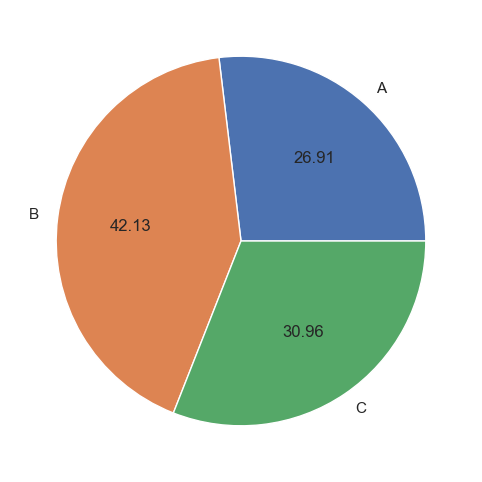

In [67]:
df.groupby('City_Category').size().plot(kind="pie", autopct="%.2f")

<Axes: ylabel='Purchase'>

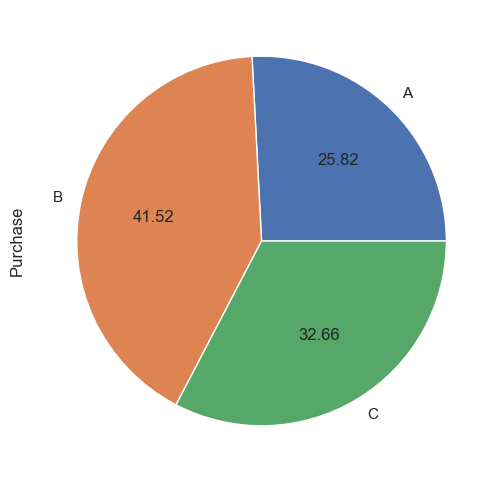

In [68]:
df.groupby('City_Category')['Purchase'].sum().plot(kind='pie', autopct="%.2f")

<Axes: ylabel='Purchase'>

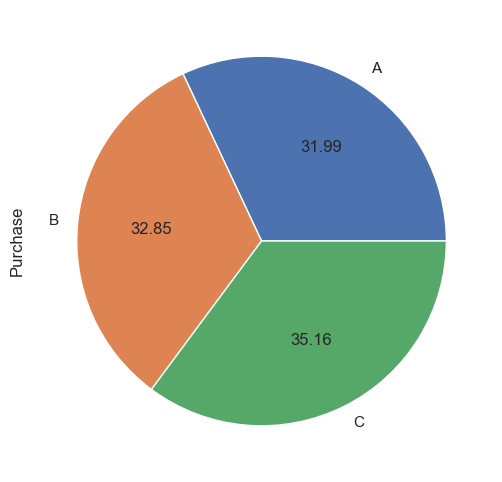

In [69]:
df.groupby('City_Category')['Purchase'].mean().plot(kind='pie', autopct="%.2f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

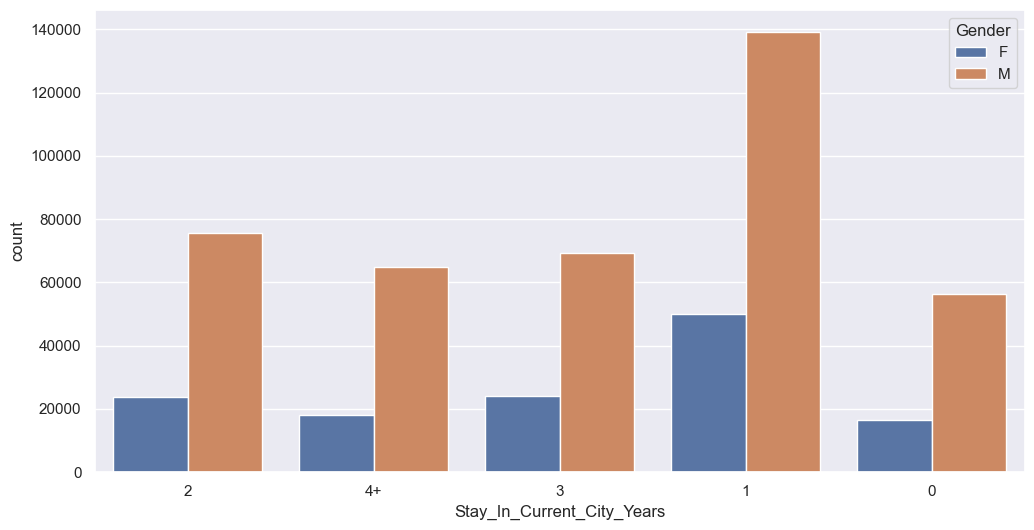

In [72]:
sns.countplot(x="Stay_In_Current_City_Years", hue='Gender', data =df)

<Axes: xlabel='Age', ylabel='count'>

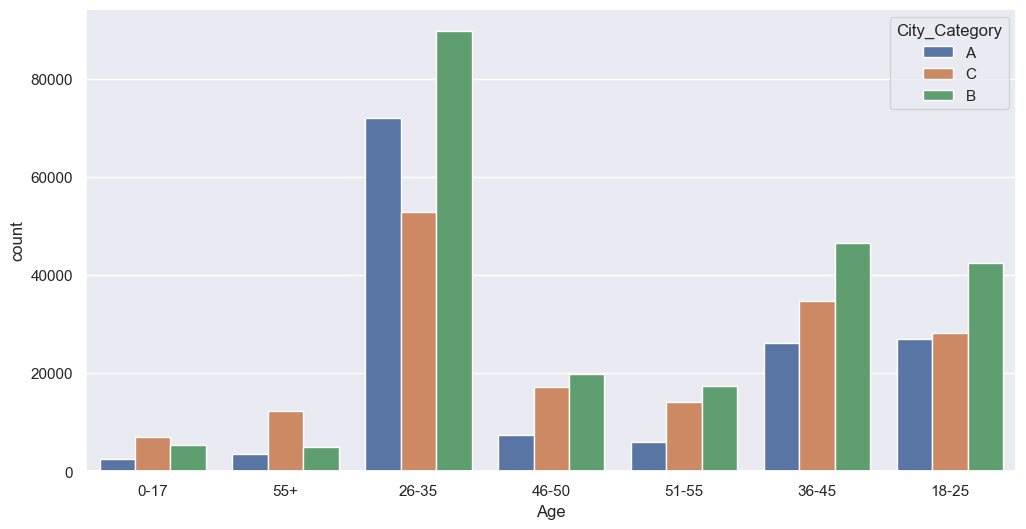

In [73]:
sns.countplot(x="Age", hue='City_Category', data =df)

<Axes: xlabel='Occupation', ylabel='count'>

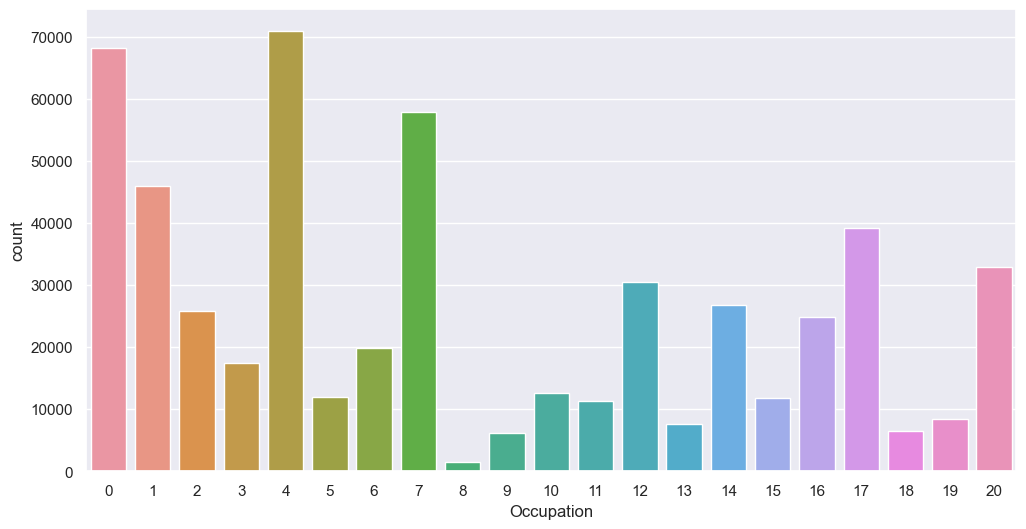

In [77]:
sns.countplot(x=df['Occupation'])

<Axes: xlabel='Occupation'>

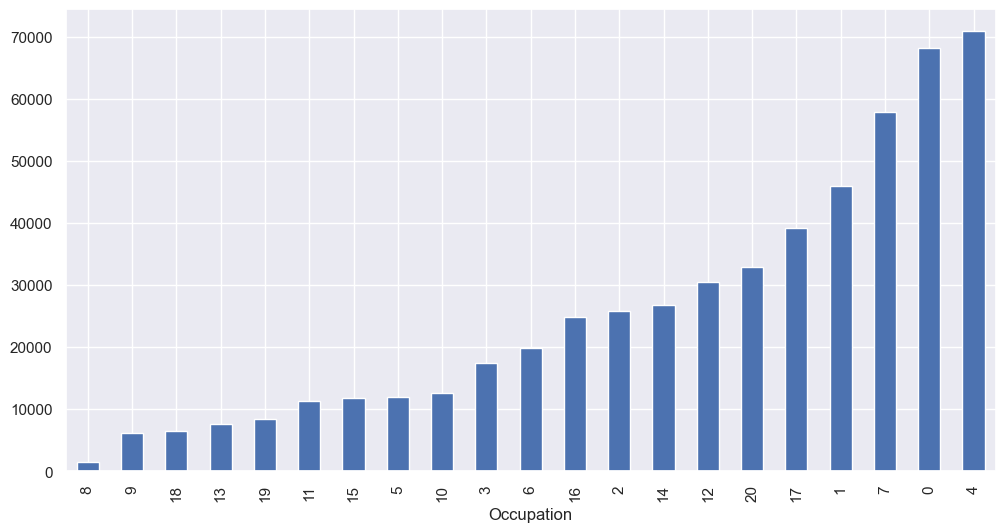

In [80]:
df.groupby('Occupation').size().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

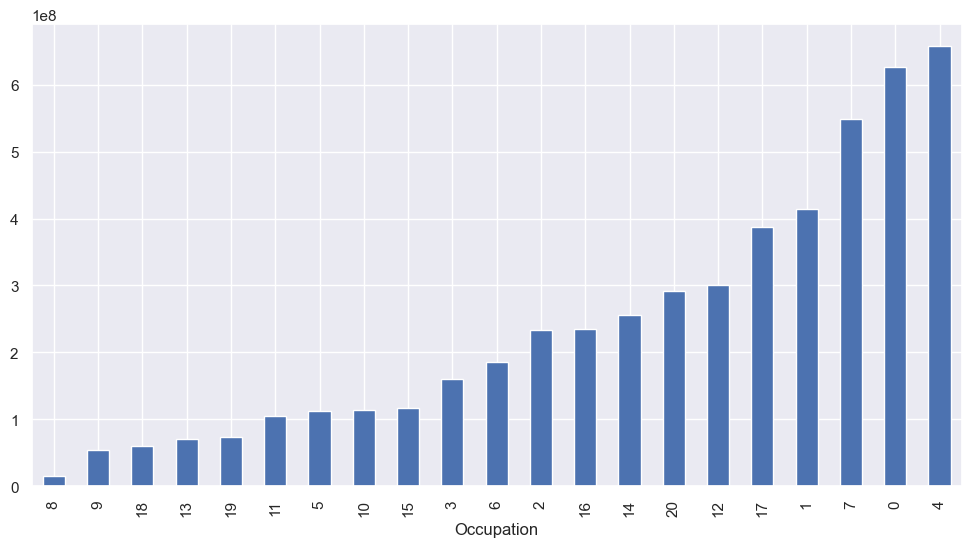

In [81]:
df.groupby('Occupation')['Purchase'].sum().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

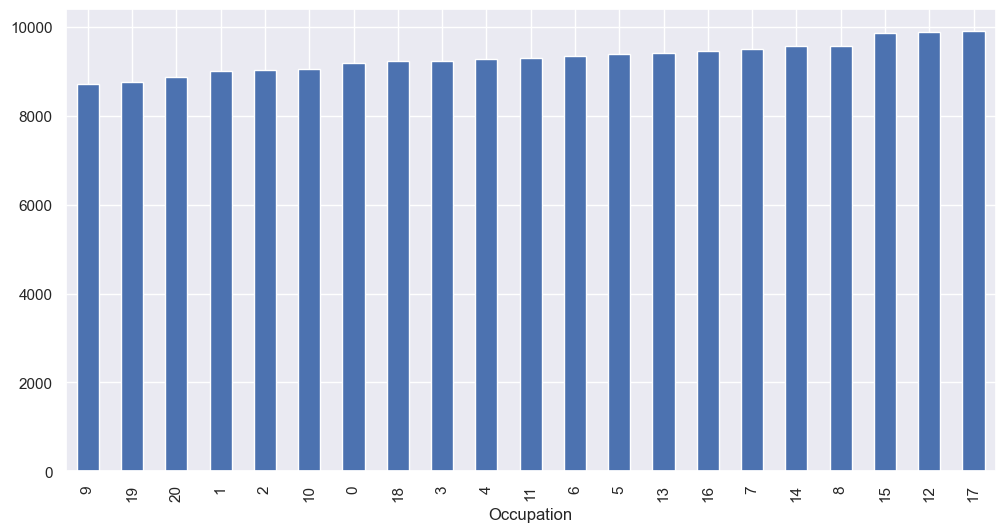

In [82]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

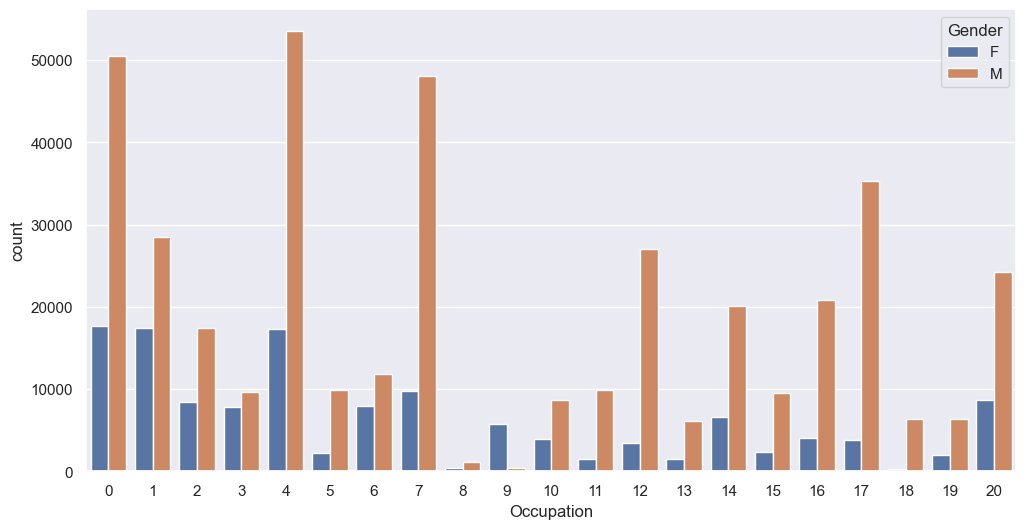

In [83]:
sns.countplot(x=df['Occupation'], hue=df['Gender'])

<Axes: xlabel='Occupation'>

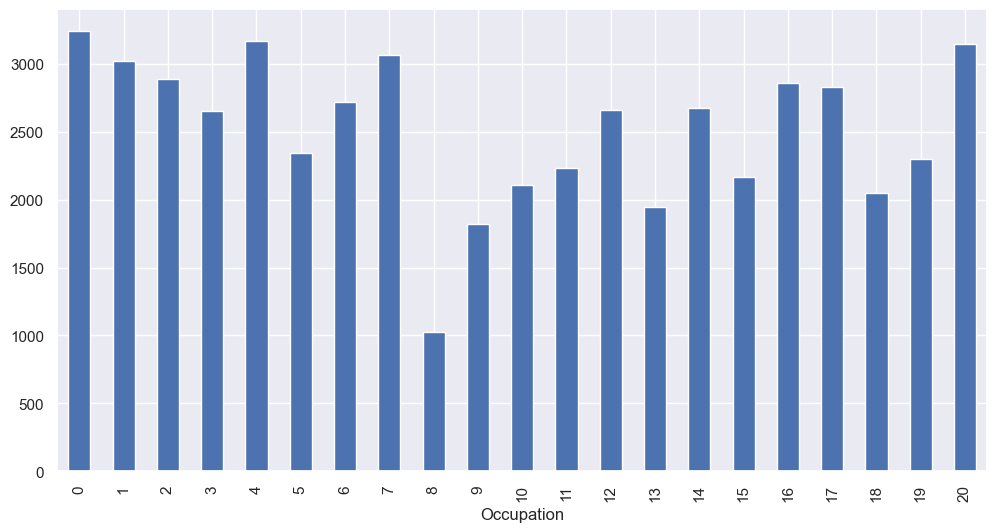

In [85]:
df.groupby('Occupation').nunique()['Product_ID'].plot(kind='bar')

<Axes: xlabel='Occupation'>

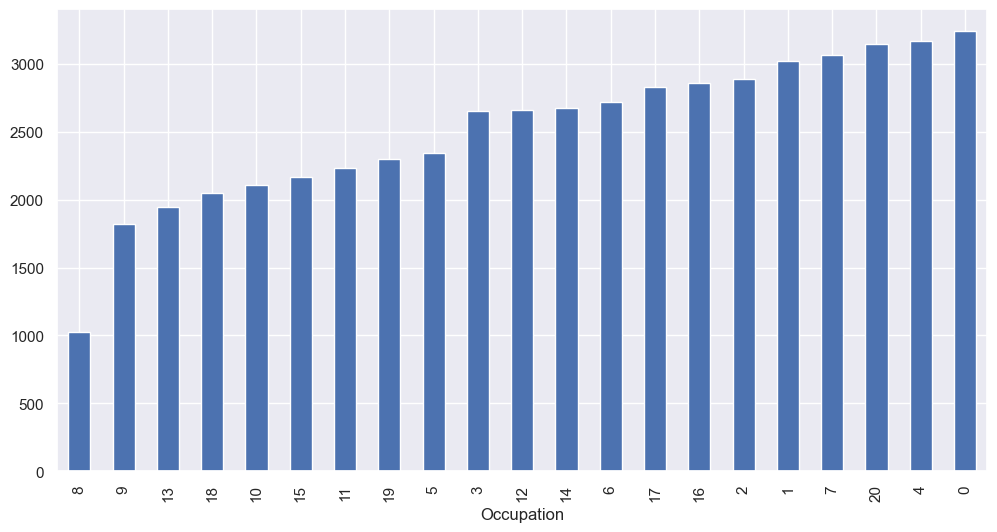

In [86]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

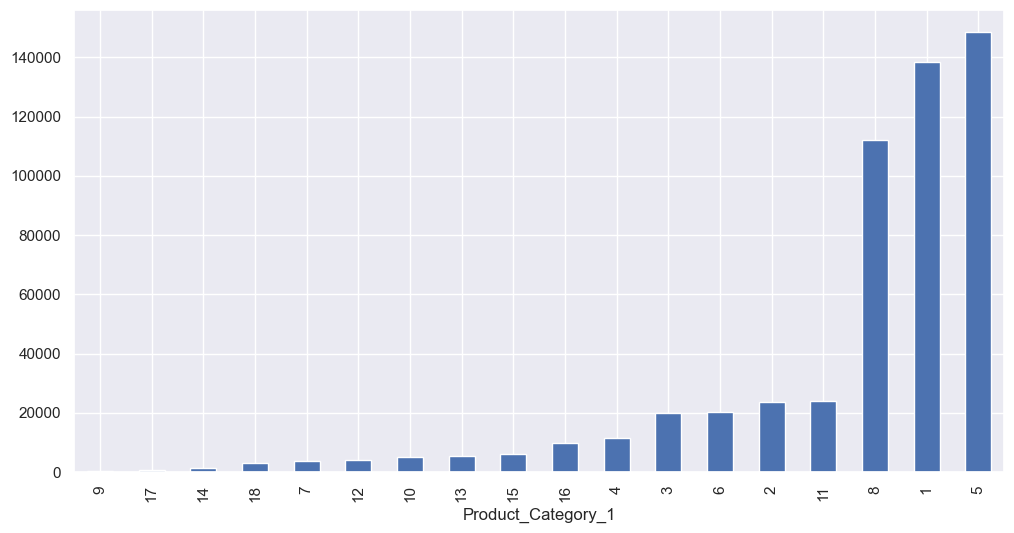

In [88]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

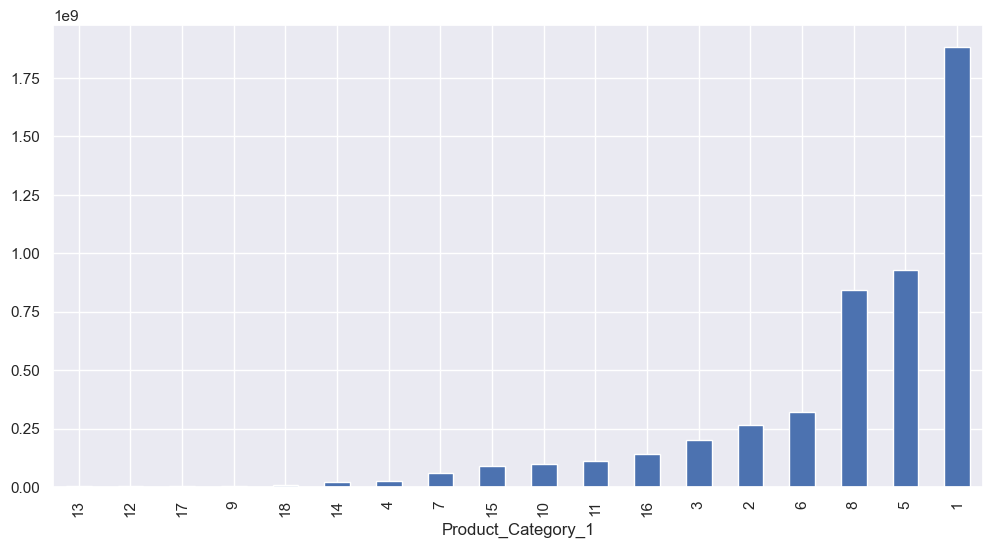

In [90]:
df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

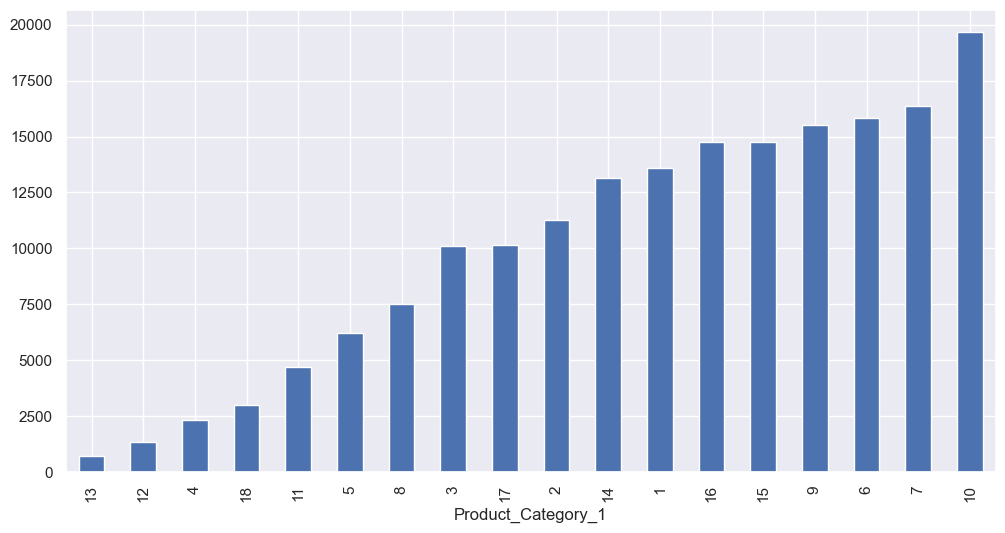

In [91]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

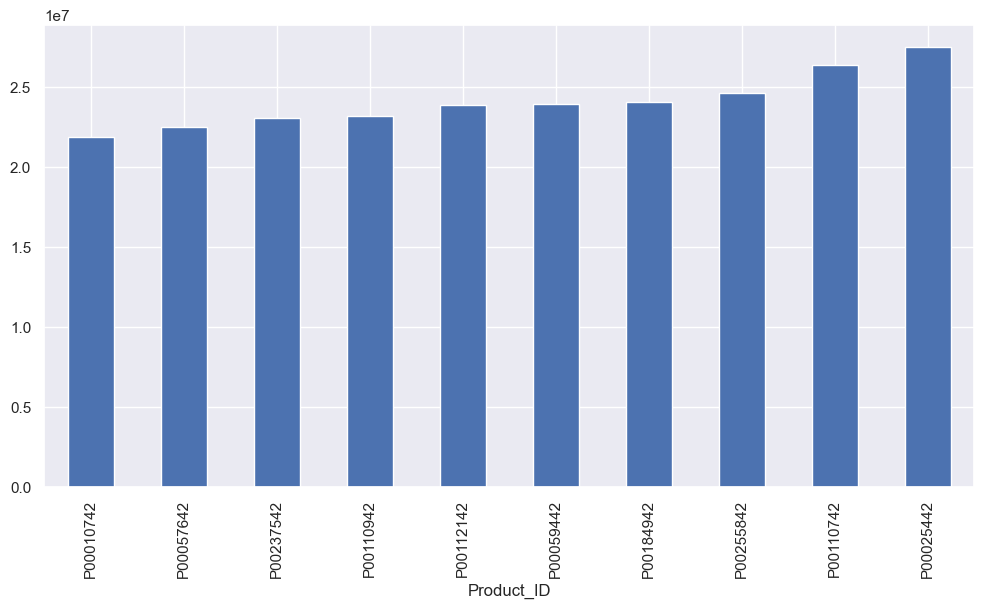

In [93]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

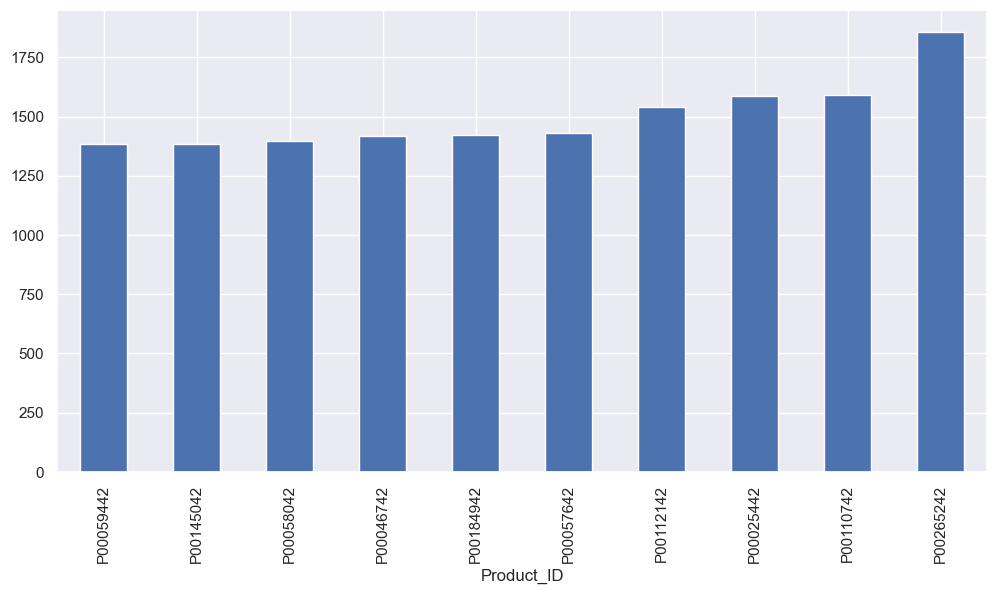

In [94]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

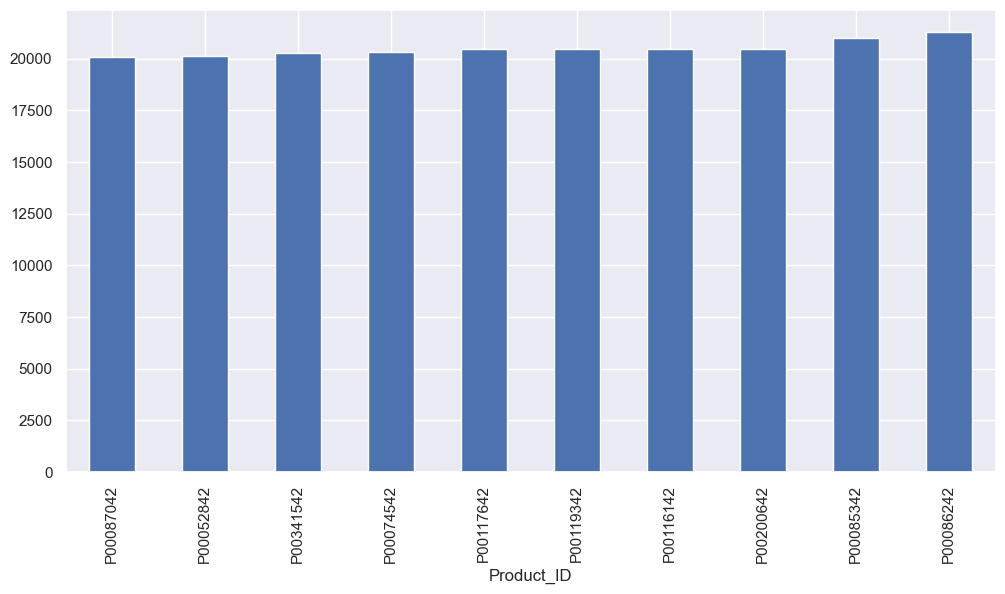

In [95]:
df.groupby('Product_ID')['Purchase'].mean().nlargest(10).sort_values().plot(kind='bar')

<Axes: xlabel='Gender'>

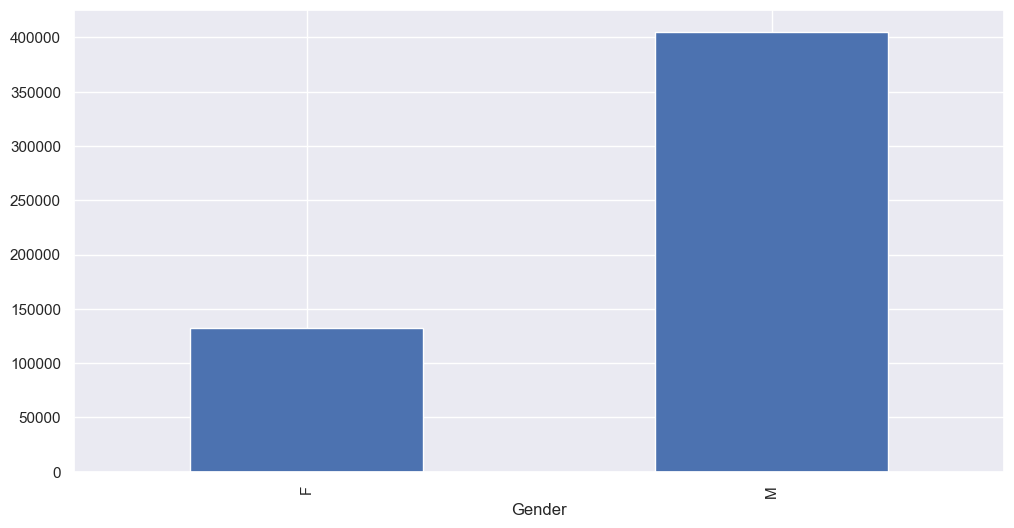

In [97]:
df.groupby('Gender').size().plot(kind='bar')

<Axes: xlabel='Gender', ylabel='count'>

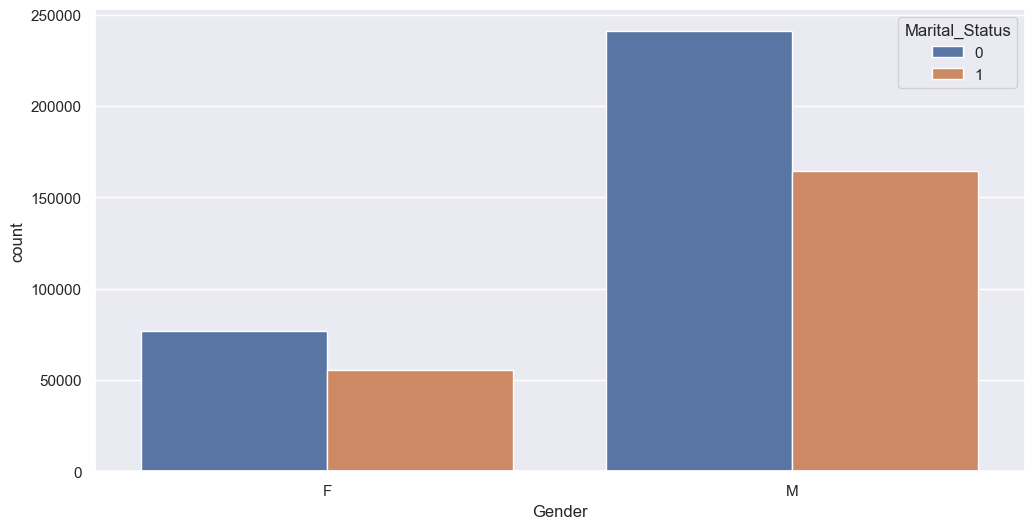

In [100]:
sns.countplot(x='Gender', hue='Marital_Status', data=df)

In [101]:
l=[]
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender']=l

In [103]:
df.head()
del df['Product_Category_3']

In [104]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

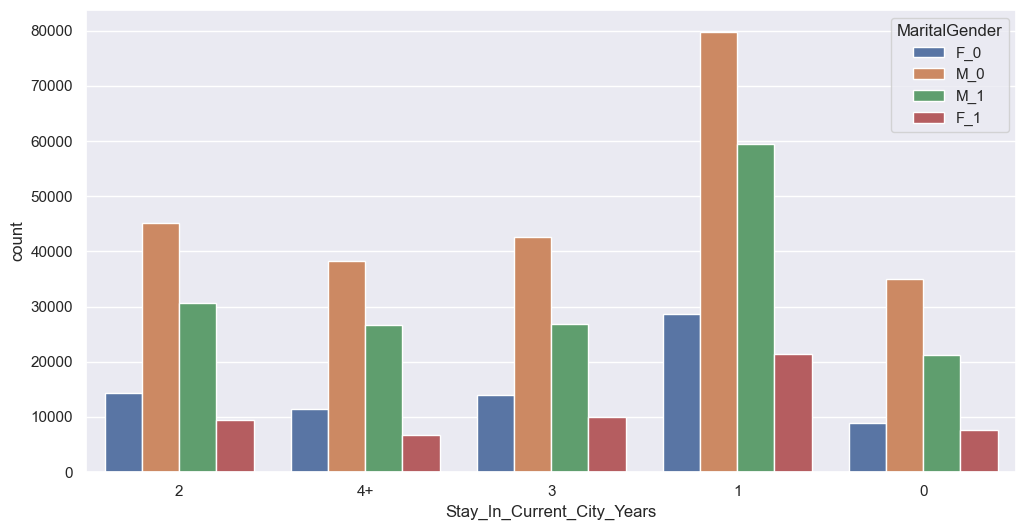

In [109]:
sns.countplot(x=df['Stay_In_Current_City_Years'], hue=df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

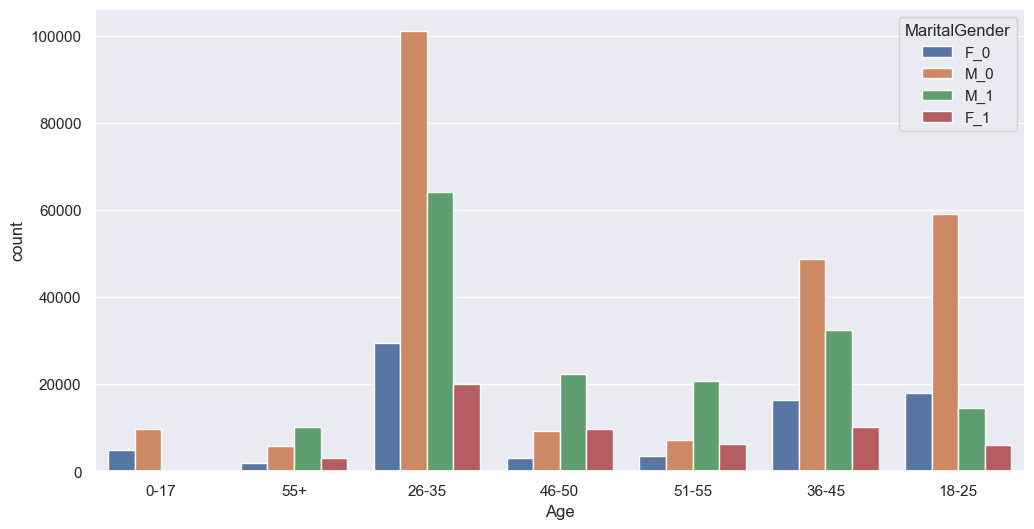

In [110]:
sns.countplot(x=df['Age'], hue=df['MaritalGender'])

<Axes: xlabel='MaritalGender', ylabel='count'>

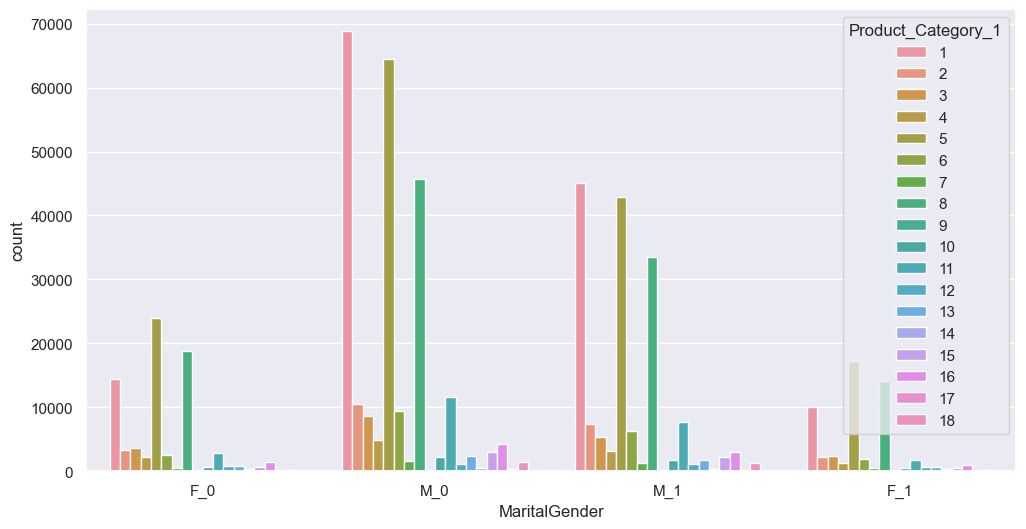

In [111]:
sns.countplot(x=df['MaritalGender'], hue=df['Product_Category_1'])